# 1. Data expoloration


In [1]:
import time, matplotlib, sklearn

# visualizatoin 
import matplotlib.pyplot as plt 

# data wrangling
import pandas as pd
import numpy as np 
import seaborn as sns
import fairlearn as fl

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

from fairlearn.metrics import MetricFrame, make_derived_metric
from fairlearn.metrics import selection_rate, count, false_positive_rate, false_negative_rate
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

# learning
from sklearn.linear_model import LogisticRegression

# the data intro has been tested with the following versions
print("pandas        Tested version: 2.0.3   Your version: %s" % pd.__version__)
print("numpy         Tested version: 1.21.5  Your version: %s" % np.__version__)
print("matplotlib    Tested version: 3.5.3   Your version: %s" % matplotlib.__version__)
print("scikit-learn  Tested version: 1.2.2   Your version: %s" % sklearn.__version__)

pandas        Tested version: 2.0.3   Your version: 2.2.1
numpy         Tested version: 1.21.5  Your version: 1.26.4
matplotlib    Tested version: 3.5.3   Your version: 3.5.1
scikit-learn  Tested version: 1.2.2   Your version: 1.4.1.post1


In [2]:
# description
description = pd.read_csv('data/WiDS_Datathon_2020_Dictionary.csv')
description_dict = description.set_index('Variable Name').to_dict(orient='index')
# data
df = pd.read_csv('data/training_v2.csv')

df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [3]:
# Check the data set for missing values
print(df.info())

# Descriptive statistics for each variable in the statistical data set
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB
None
        encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818  

## 1.1 Missing vales statistics

Missing value statistics：
                               Missing Values Percentage
encounter_id                                0      0.00%
patient_id                                  0      0.00%
hospital_id                                 0      0.00%
hospital_death                              0      0.00%
age                                      4228      4.61%
bmi                                      3429      3.74%
elective_surgery                            0      0.00%
ethnicity                                1395      1.52%
gender                                     25      0.03%
height                                   1334      1.45%
hospital_admit_source                   21409     23.34%
icu_admit_source                          112      0.12%
icu_id                                      0      0.00%
icu_stay_type                               0      0.00%
icu_type                                    0      0.00%
pre_icu_los_days                            0      0.00%
readm

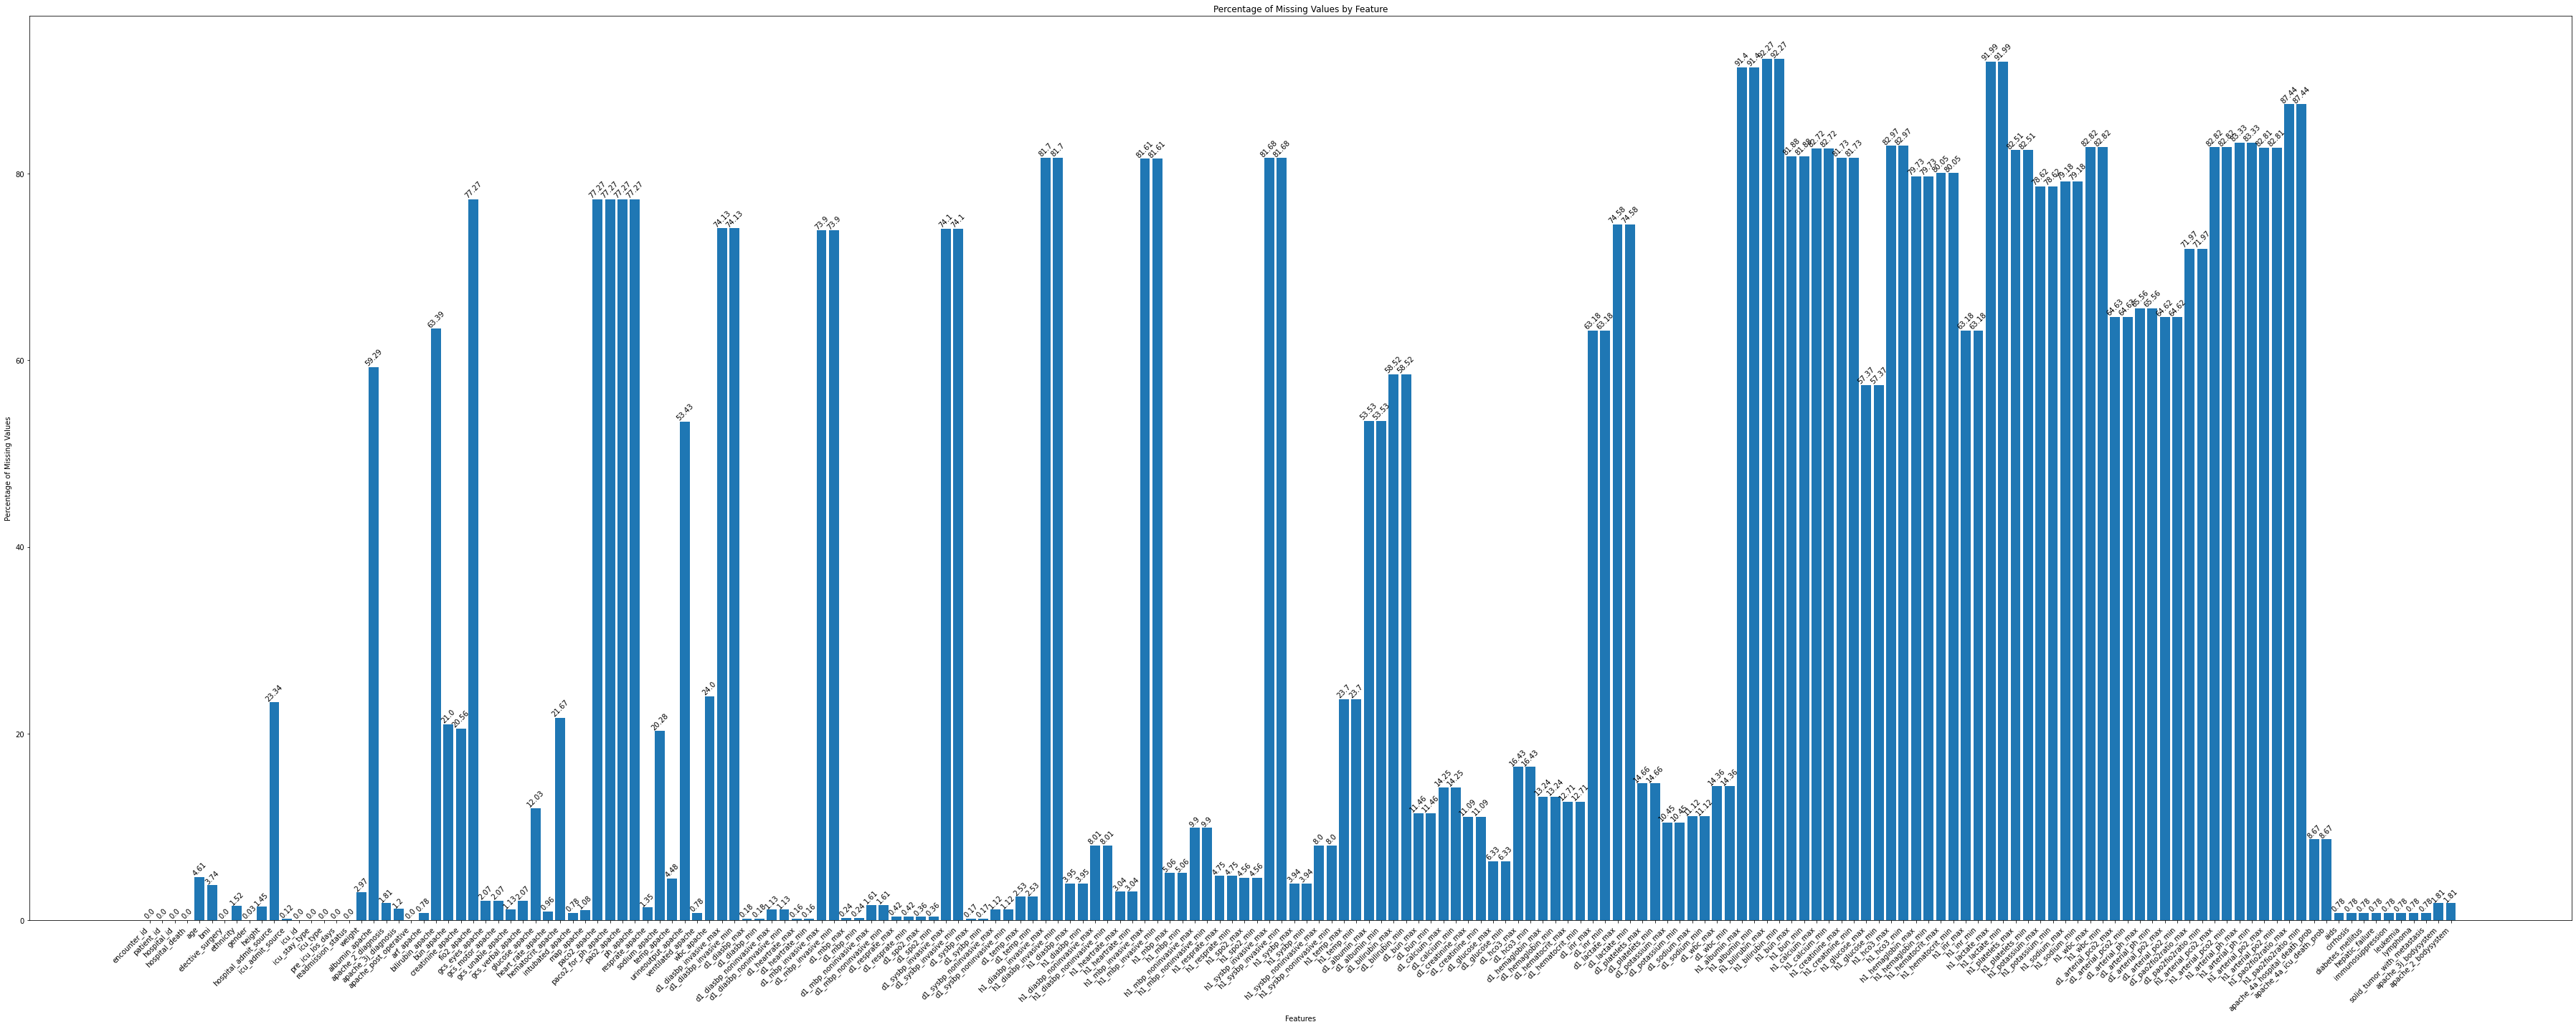

In [4]:
# Missing values
# Check the data set for missing values
missing_values = df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Calculate the proportion of missing values in each column
missing_percentage = (missing_count / len(df)) * 100

# Create a DataFrame that contains missing value statistics
missing_data_info = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_data_info['Percentage'] = missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')
print("Missing value statistics：")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(missing_data_info)

# Visualize
missing_data_info['Percentage'] = missing_data_info['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20))  # figure size
plt.bar(missing_data_info.index, missing_data_info['Percentage'])
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info.index), 1), rotation=45, ha='right')
plt.tight_layout()  # Prevent label overlap
for i, percentage in enumerate(missing_data_info['Percentage']):
    plt.text(i, percentage, percentage, ha='center', va='bottom', rotation=45)
plt.show()




## 1.2 Data distribution

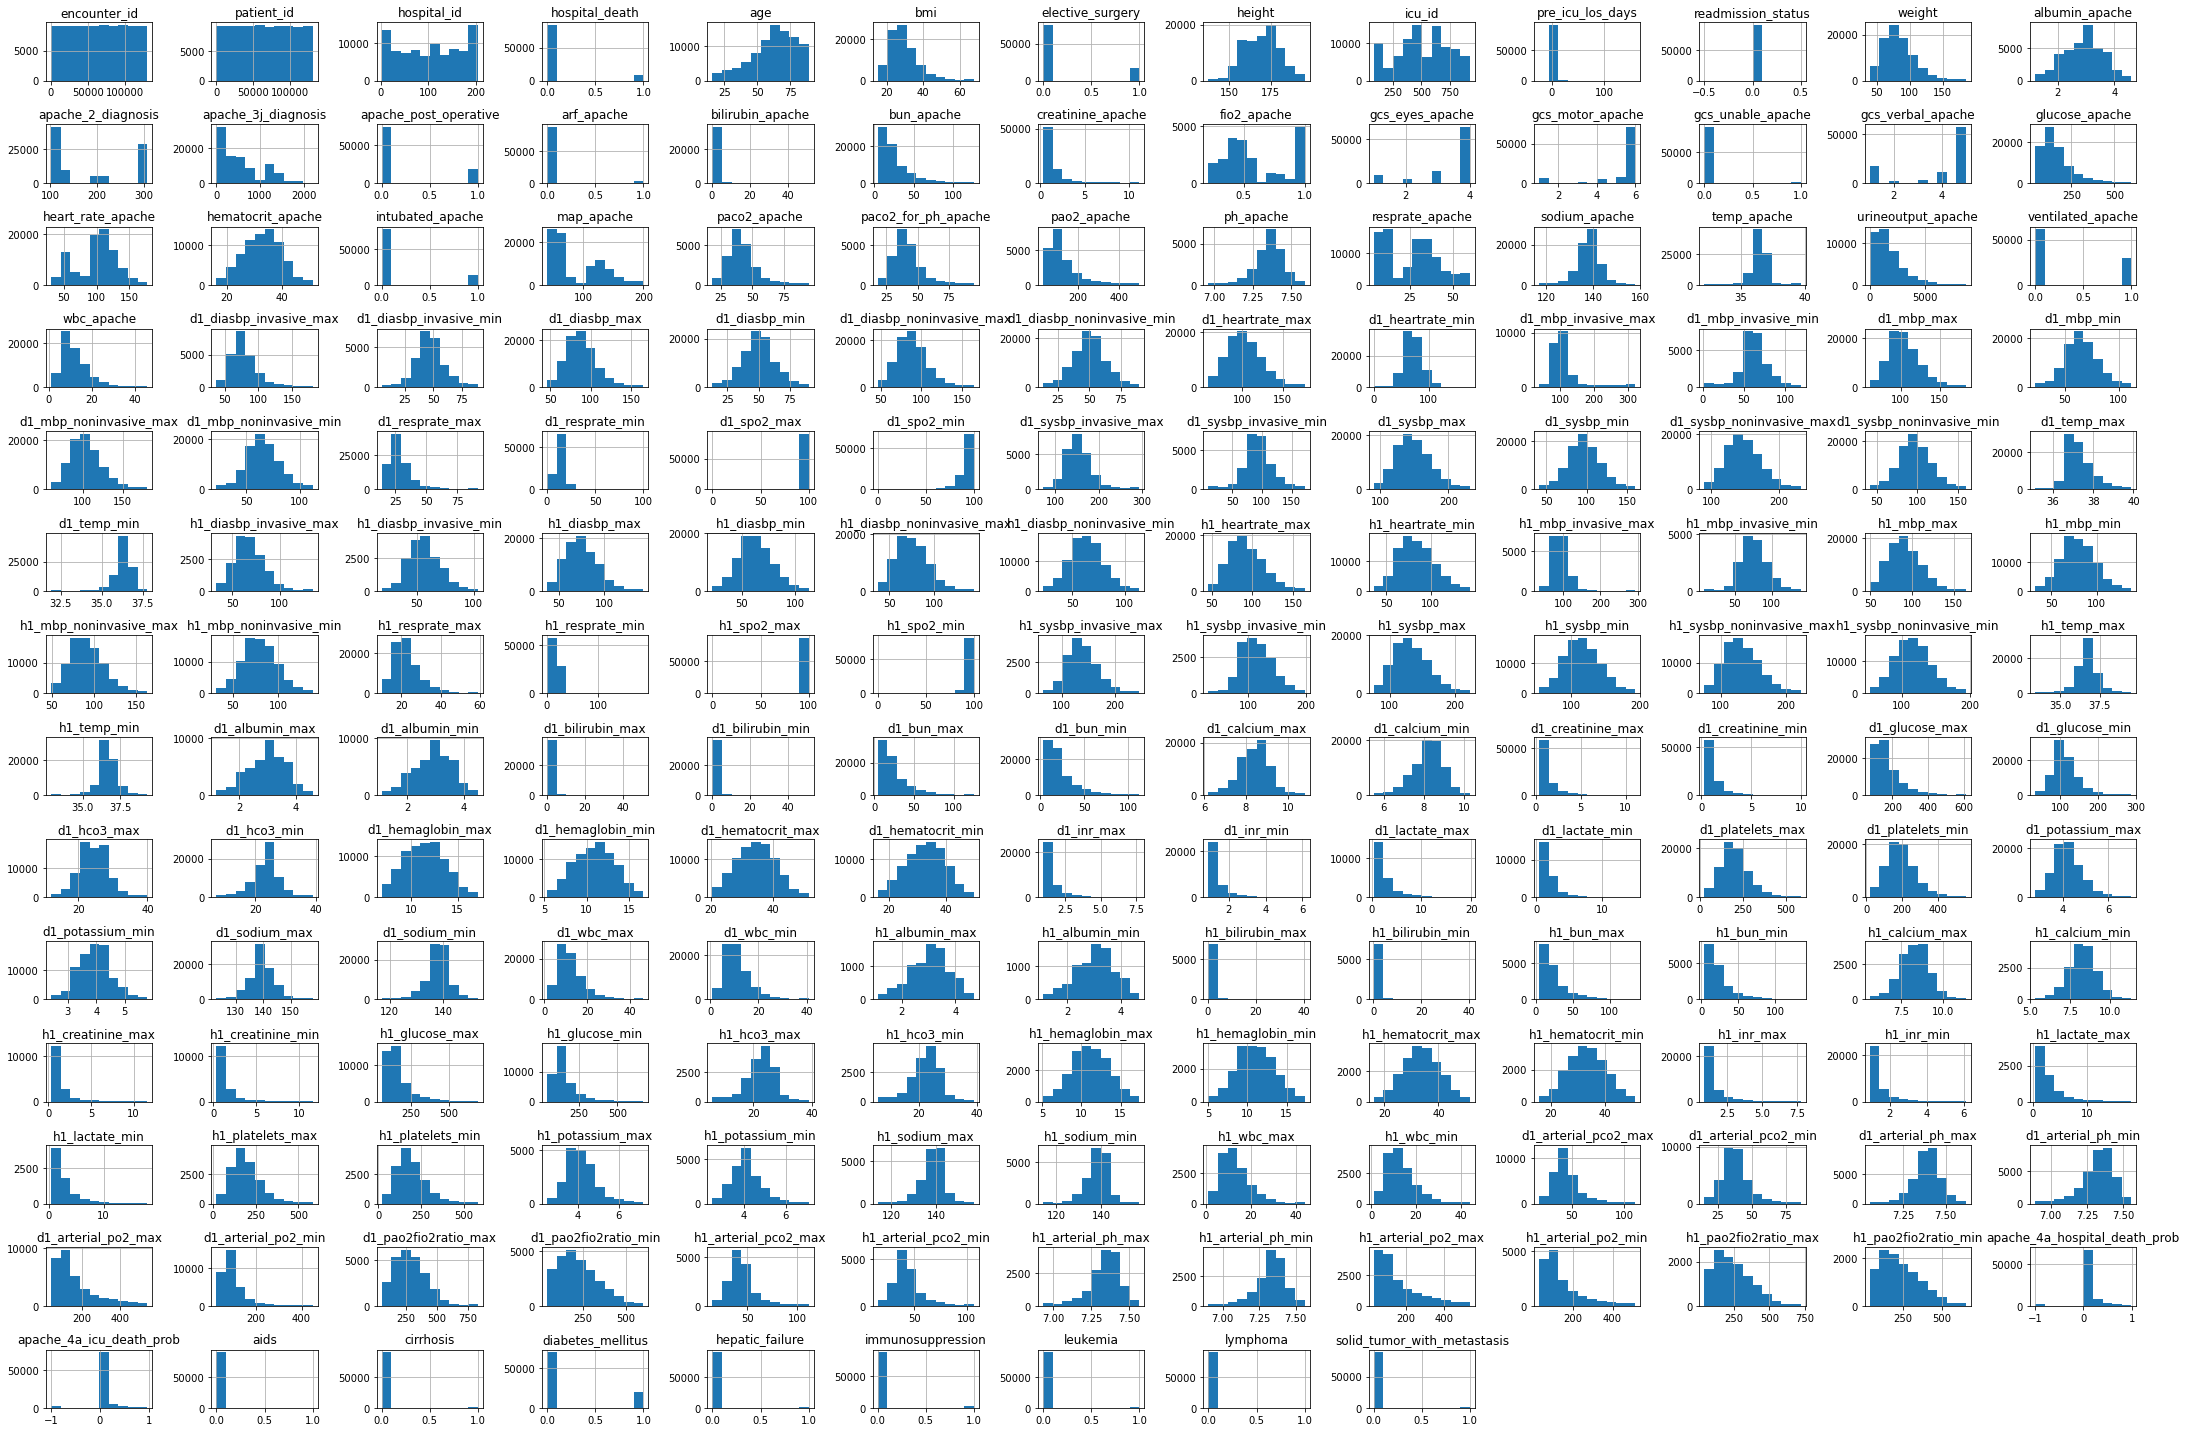

In [5]:
# Histogram of data distribution
df.hist(figsize=(30, 20))
plt.tight_layout()
plt.show()


## 1.3 Pairwise correlations

In [6]:
# # Calculate the correlation coefficient matrix
# selected_variables = df.columns[:186] 
# correlation_matrix = df[selected_variables].corr()
# print(correlation_matrix)
# # Heatmap visualization
# plt.figure(figsize=(80, 70))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.tight_layout()
# plt.show()

# 2. Data pre-pocessing

## 2.1 Delate features

In [7]:
# Delate features
# Set the proportion threshold of missing values
threshold = 20

# Find features with missing value proportion greater than the threshold
features_to_drop = missing_data_info[missing_data_info['Percentage'] > threshold].index.tolist()

# Ensure that feature names exist in the column labels of the DataFrame
features_to_drop = [feature for feature in features_to_drop if feature in df.columns]

# Delete features if they exist
if features_to_drop:
    # Delete features
    df = df.drop(features_to_drop, axis=1)
    
    # Print deleted features
    print("Deleted features: ")
    for i in range(0, len(features_to_drop), 5):
        print(', '.join(features_to_drop[i:i+5]))

    # Print missing value statistics for the remaining features
    remaining_features_count = len(df.columns)
    print("Number of remaining features:", remaining_features_count)
    remaining_missing_values = df.isnull().sum()
    remaining_missing_percentage = (remaining_missing_values / len(df)) * 100
    remaining_missing_data_info = pd.DataFrame({'Missing Values': remaining_missing_values, 'Percentage': remaining_missing_percentage})
    remaining_missing_data_info['Percentage'] = remaining_missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')
    print("Missing value statistics for the remaining features: ")
    print(remaining_missing_data_info)

    # Save the processed data set to a new CSV file
    df.to_csv('cleaned_data.csv', index=False)
    print("The processed data set is saved to cleaned_data.csv file")
else:
    print("No features to delete, the original data set is saved to cleaned_data.csv file")

Deleted features: 
hospital_admit_source, albumin_apache, bilirubin_apache, bun_apache, creatinine_apache
fio2_apache, hematocrit_apache, paco2_apache, paco2_for_ph_apache, pao2_apache
ph_apache, sodium_apache, urineoutput_apache, wbc_apache, d1_diasbp_invasive_max
d1_diasbp_invasive_min, d1_mbp_invasive_max, d1_mbp_invasive_min, d1_sysbp_invasive_max, d1_sysbp_invasive_min
h1_diasbp_invasive_max, h1_diasbp_invasive_min, h1_mbp_invasive_max, h1_mbp_invasive_min, h1_sysbp_invasive_max
h1_sysbp_invasive_min, h1_temp_max, h1_temp_min, d1_albumin_max, d1_albumin_min
d1_bilirubin_max, d1_bilirubin_min, d1_inr_max, d1_inr_min, d1_lactate_max
d1_lactate_min, h1_albumin_max, h1_albumin_min, h1_bilirubin_max, h1_bilirubin_min
h1_bun_max, h1_bun_min, h1_calcium_max, h1_calcium_min, h1_creatinine_max
h1_creatinine_min, h1_glucose_max, h1_glucose_min, h1_hco3_max, h1_hco3_min
h1_hemaglobin_max, h1_hemaglobin_min, h1_hematocrit_max, h1_hematocrit_min, h1_inr_max
h1_inr_min, h1_lactate_max, h1_lacta

The processed data set is saved to cleaned_data.csv file


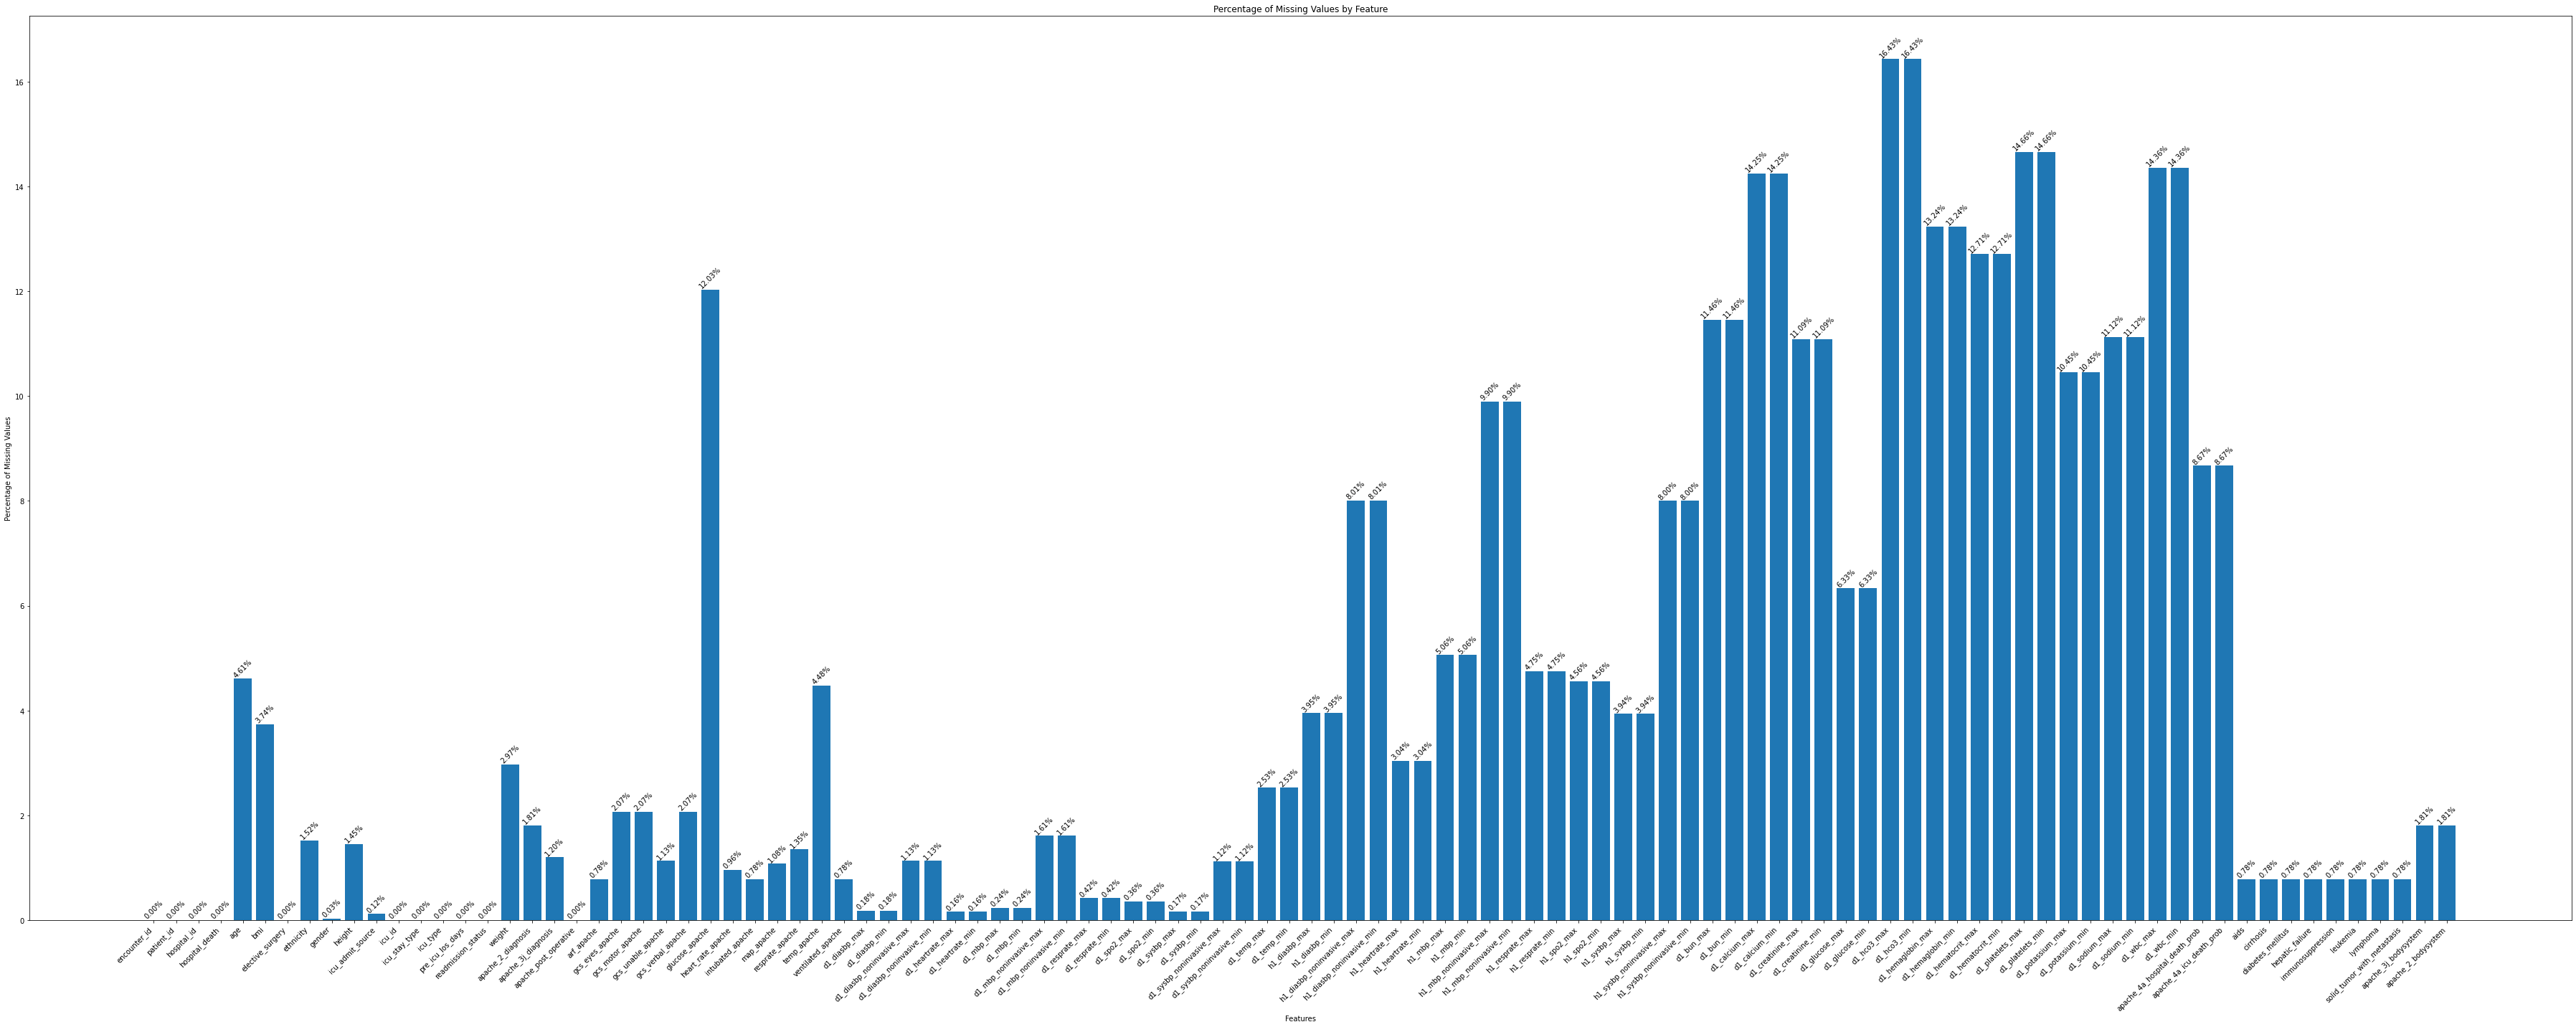

In [8]:
# Read cleaned_data.csv file
df = pd.read_csv('cleaned_data.csv')

# Calculate missing value statistics
missing_values = df.isnull()
missing_count = missing_values.sum()
missing_percentage = (missing_count / len(df)) * 100
missing_data_info = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_data_info['Percentage'] = missing_data_info['Percentage'].apply(lambda x: f'{x:.2f}%')

# Visualize
missing_data_info['Percentage'] = missing_data_info['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20))  
plt.bar(missing_data_info.index, missing_data_info['Percentage'])
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info.index), 1), rotation=45, ha='right')
plt.tight_layout()  
for i, percentage in enumerate(missing_data_info['Percentage']):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', rotation=45)  # 修改此处以保留两位小数
plt.show()


## 2.2 One-Hot Encoding

In [9]:
# One-Hot Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded feature with the numerical feature
df_numeric = df.select_dtypes(exclude=['object'])
df_combined = pd.concat([df_numeric, df_encoded], axis=1)
print("Finished One-Hot Encoding")

Finished One-Hot Encoding


## 2.3 KNNImputer

In [10]:
# # KnnImputer usually take more than 20 mintues please be patience.
# # The missing values are imputed using KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)

# # Save to .csv file
# df_imputed.to_csv('cleaned_data_imputed.csv', index=False)
# print("The imputed data set is saved to cleaned_data_imputed.csv 文件")

Number of features: 147
Missing value statistics for the imputed data set:
                                            Missing Values Percentage
encounter_id                                             0      0.00%
patient_id                                               0      0.00%
hospital_id                                              0      0.00%
hospital_death                                           0      0.00%
age                                                      0      0.00%
bmi                                                      0      0.00%
elective_surgery                                         0      0.00%
height                                                   0      0.00%
icu_id                                                   0      0.00%
pre_icu_los_days                                         0      0.00%
readmission_status                                       0      0.00%
weight                                                   0      0.00%
apache_2_diagno

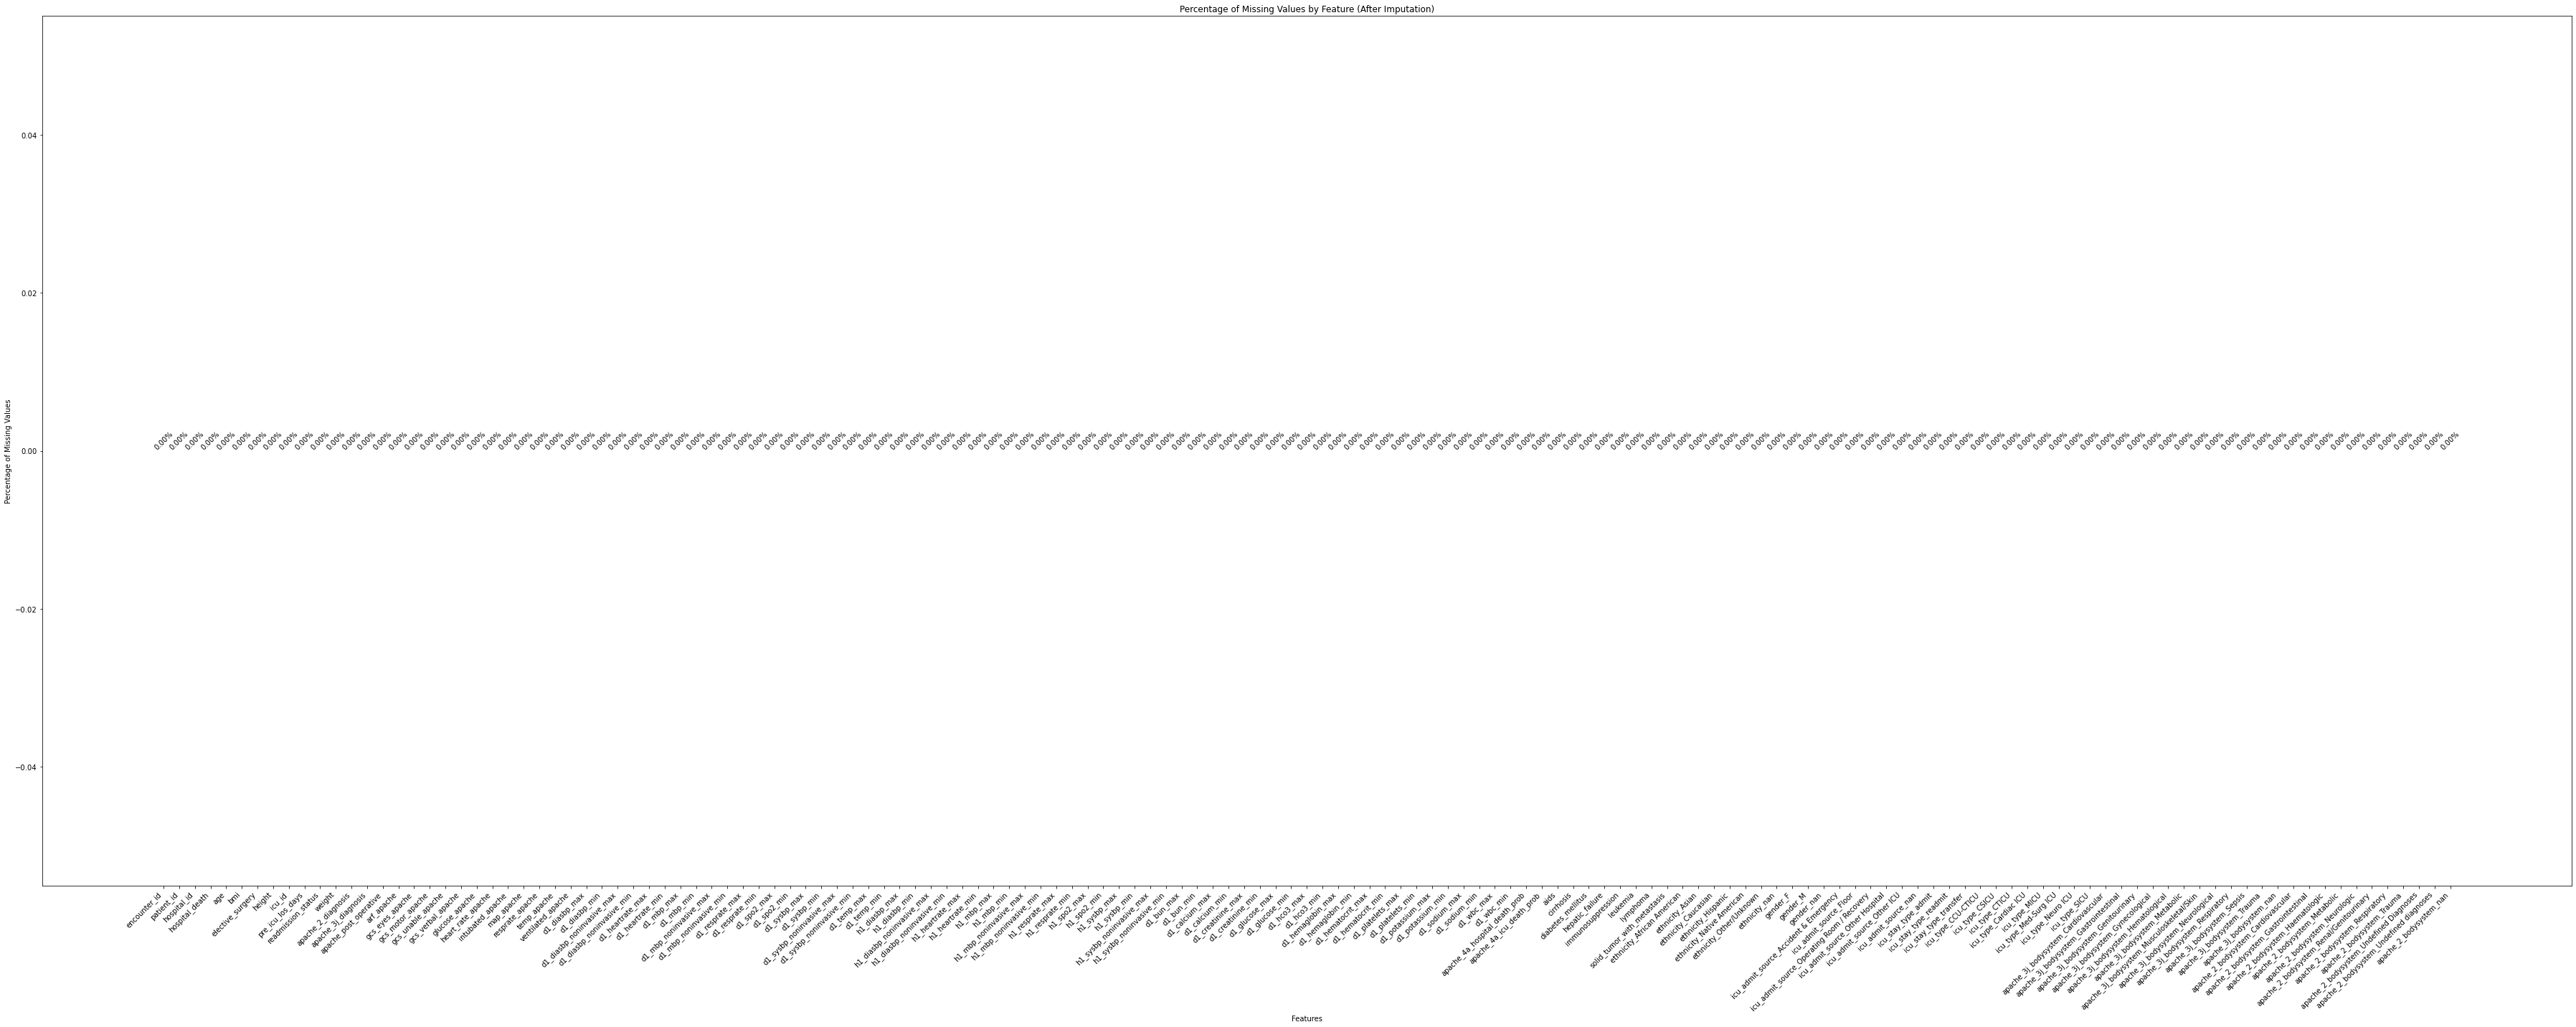

In [11]:
# Read the imputed data set
df_imputed = pd.read_csv('cleaned_data_imputed.csv')

# Statistical feature quantity
num_features = df_imputed.shape[1]
print("Number of features:", num_features)

# Calculates missing value statistics for the imputed data set
missing_values_imputed = df_imputed.isnull()
missing_count_imputed = missing_values_imputed.sum()
missing_percentage_imputed = (missing_count_imputed / len(df_imputed)) * 100
missing_data_info_imputed = pd.DataFrame({'Missing Values': missing_count_imputed, 'Percentage': missing_percentage_imputed})
missing_data_info_imputed['Percentage'] = missing_data_info_imputed['Percentage'].apply(lambda x: f'{x:.2f}%')
print("Missing value statistics for the imputed data set:")
print(missing_data_info_imputed)

# Visualize
missing_data_info_imputed['Percentage'] = missing_data_info_imputed['Percentage'].str.rstrip('%').astype(float)
plt.figure(figsize=(50, 20)) 
plt.bar(missing_data_info_imputed.index, missing_data_info_imputed['Percentage'])
plt.title('Percentage of Missing Values by Feature (After Imputation)')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(np.arange(0, len(missing_data_info_imputed.index), 1), rotation=45, ha='right')
plt.tight_layout()  
for i, percentage in enumerate(missing_data_info_imputed['Percentage']):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', rotation=45)  
plt.show()


## 2.4 Divide dataset

In [12]:
# Select features manually
# save target variable
y = df_imputed['hospital_death'].copy()
# save APACHE scores for later evaluation on train / test / validation data
y_apache = df_imputed['apache_4a_hospital_death_prob'].copy()
# delate some features and save the rest
X = df_imputed.copy().drop(['hospital_death', 'patient_id', 'encounter_id', 'hospital_id', 'icu_id', # drop identifiers
                    'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', # drop APACHE scores
                    'apache_2_bodysystem_Cardiovascular', 'apache_2_bodysystem_Gastrointestinal', 'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Neurologic', 'apache_2_bodysystem_Renal/Genitourinary', 'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma', 'apache_2_bodysystem_Undefined Diagnoses', 'apache_2_bodysystem_Undefined diagnoses', 'apache_2_bodysystem_nan'], # drop because of similarity with apache_3j_bodysystem
                   axis=1)
print("Finish manually select features")

# Statistical feature quantity
num_features = X.shape[1]
print("Number of features left:", num_features)

Finish manually select features
Number of features left: 129


In [13]:
# Divide the data set into a training set and a test set
X_train, X_test, y_train, y_test, y_apache_train, y_apache_test = train_test_split(X, y, y_apache, test_size=0.2, random_state=42)

# Divide the test set into test set and validation set
X_test, X_val, y_test, y_val, y_apache_test, y_apache_val = train_test_split(X_test, y_test, y_apache_test, test_size=0.5, random_state=42)

# Print the partitioned data set shape
print("Training set shapes - Features: {}, Target: {}, Apache Score: {}".format(X_train.shape, y_train.shape, y_apache_train.shape))
print("Testing set shapes - Features: {}, Target: {}, Apache Score: {}".format(X_test.shape, y_test.shape, y_apache_test.shape))
print("Validation set shapes - Features: {}, Target: {}, Apache Score: {}".format(X_val.shape, y_val.shape, y_apache_val.shape))

Training set shapes - Features: (73370, 129), Target: (73370,), Apache Score: (73370,)
Testing set shapes - Features: (9171, 129), Target: (9171,), Apache Score: (9171,)
Validation set shapes - Features: (9172, 129), Target: (9172,), Apache Score: (9172,)


In [14]:
len(X_train)

73370

In [15]:
pip install -U threadpoolctl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 2.5 SMOTE Oversampling

In [16]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE object
smote = SMOTE(random_state=42)

# Oversampling the training set
X_train_res, y_train_res= smote.fit_resample(X_train, y_train)

# Print the number of samples after oversampling
print("Number of samples after SMOTE over-sampling:", len(X_train_res))


Number of samples after SMOTE over-sampling: 134084


In [17]:
len(y_train[y_train == 0]), len(y_train[y_train == 1])

(67042, 6328)

In [18]:
len(y_train_res[y_train_res == 0]), len(y_train_res[y_train_res == 1])

(67042, 67042)

# 3. Model Selection

## 3.1. Useful functions

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def showConfusionMatrix(cm):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [21]:
def getMetrics(cm):
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    tnr = tn / (tn + fp)
    tpr = tp / (tp + fn)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    print(f"True Positive Rate (TPR): {tpr}")
    print(f"True Negative Rate (TNR): {tnr}")

    return accuracy, precision, recall, f1, tnr, tpr

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

def plotROC(y_true, y_scores, auc_roc, name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {name}')
    plt.legend(loc="lower right")
    plt.show()

## 3.2. Model selection

## Logistic regression

In [23]:
# train logistic regression model
lr = LogisticRegression(penalty='l1', solver='saga')
lr.fit(X_train_res, y_train_res)
lr_pred = lr.predict(X_val)

/home/popo/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
cm_lr = confusion_matrix(y_val, lr_pred)
accuracy_lr, precision_lr, recall_lr, f1_lr, tpr_lr, tnr_lr = getMetrics(cm_lr)

Accuracy: 0.79
Precision: 0.26
Recall: 0.77
F1: 0.38
True Positive Rate (TPR): 0.7699115044247787
True Negative Rate (TNR): 0.7895239231595275


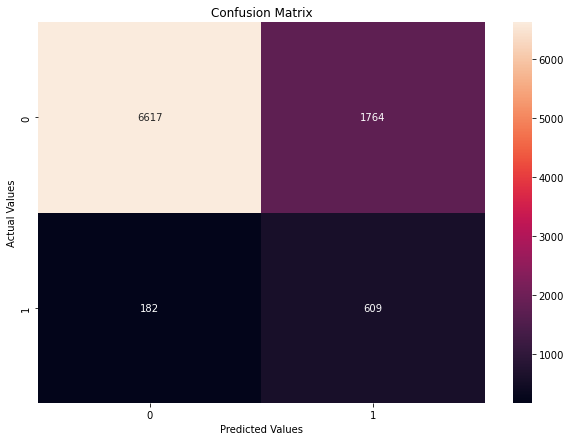

In [25]:
showConfusionMatrix(cm_lr)

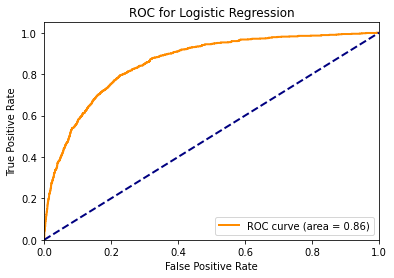

In [26]:
auc_lr = roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1])
plotROC(y_val, lr.predict_proba(X_val)[:, 1], auc_lr, "Logistic Regression")

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train_res, y_train_res)

dt_pred = dt.predict(X_val)

cm_dt = confusion_matrix(y_val, dt_pred)

accuracy_dt, precision_dt, recall_dt, f1_dt, tpr_dt, tnr_dt = getMetrics(cm_dt)

Accuracy: 0.87
Precision: 0.29
Recall: 0.37
F1: 0.32
True Positive Rate (TPR): 0.37041719342604296
True Negative Rate (TNR): 0.9130175396730701


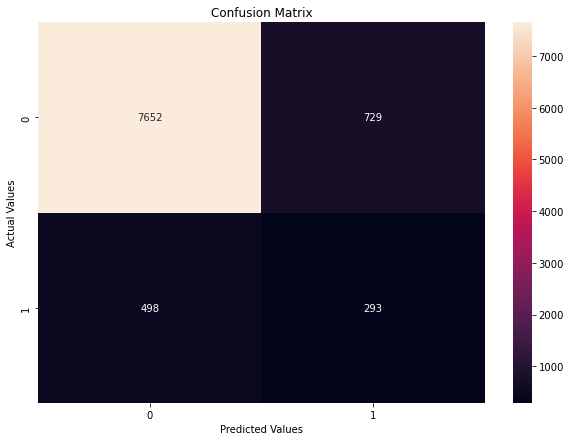

In [28]:
showConfusionMatrix(cm_dt)

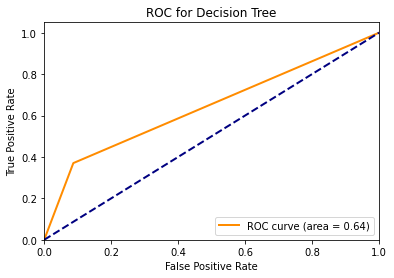

In [29]:
auc_dt = roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1])
plotROC(y_val, dt.predict_proba(X_val)[:, 1], auc_dt, "Decision Tree")

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_res, y_train_res)

rf_pred = rf.predict(X_val)

cm_rf = confusion_matrix(y_val, rf_pred)

In [31]:
accuracy_rf, precision_rf, recall_rf, f1_rf, tpr_rf, tnr_rf = getMetrics(cm_rf)

Accuracy: 0.92
Precision: 0.58
Recall: 0.32
F1: 0.41
True Positive Rate (TPR): 0.3223767383059418
True Negative Rate (TNR): 0.9778069442787257


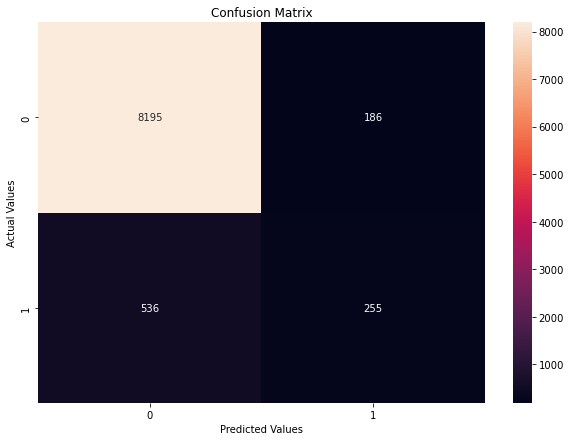

In [32]:
showConfusionMatrix(cm_rf)

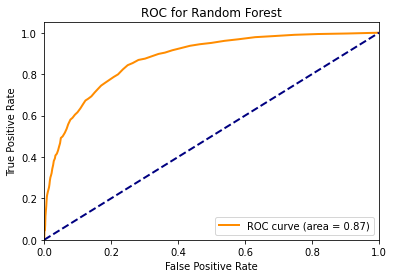

In [33]:
auc_rf = roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])
plotROC(y_val, rf.predict_proba(X_val)[:, 1], auc_rf, "Random Forest")

## Gradient Boosting

In [34]:
from sklearn.ensemble import HistGradientBoostingClassifier

gb = HistGradientBoostingClassifier(max_iter=100).fit(X_train_res, y_train_res)
gb_pred = gb.predict(X_val)
cm_gb = confusion_matrix(y_val, gb_pred)
accuracy_gb, precision_gb, recall_gb, f1_gb, tpr_gb, tnr_gb = getMetrics(cm_gb)

Accuracy: 0.93
Precision: 0.65
Recall: 0.35
F1: 0.45
True Positive Rate (TPR): 0.3463969658659924
True Negative Rate (TNR): 0.982221691922205


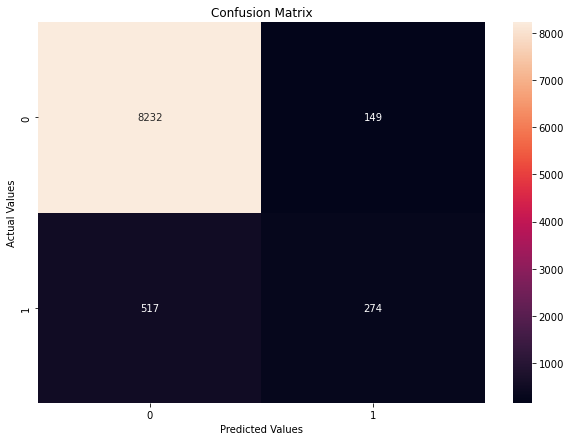

In [35]:
showConfusionMatrix(cm_gb)

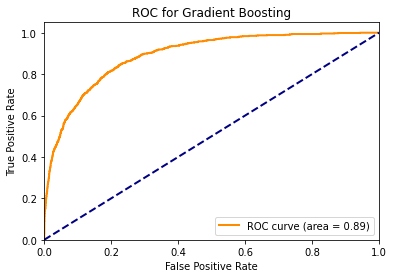

In [36]:
auc_gb = roc_auc_score(y_val, gb.predict_proba(X_val)[:, 1])
plotROC(y_val, gb.predict_proba(X_val)[:, 1], auc_gb, "Gradient Boosting")

## Gradient boosting with cost matrix

In [37]:
cost_matrix = {
    'FP': 1,  # Cost of false positive
    'FN': 13.1002   # Cost of false negative
}

# Compute sample weights based on misclassification costs
sample_weights = []
for y_true in y_train_res:
    if y_true == 0:
        sample_weights.append(cost_matrix['FP'])  # Assign higher weight to false positives
    else:
        sample_weights.append(cost_matrix['FN'])  # Assign higher weight to false negatives

# Instantiate the GradientBoostingClassifier and pass the sample weights
gb_cm = HistGradientBoostingClassifier(random_state=42)
gb_cm.fit(X_train_res, y_train_res, sample_weight=sample_weights)

# Make predictions
gb_cm_pred = gb_cm.predict(X_val)

In [38]:
cm_gb_cm = confusion_matrix(y_val, gb_pred)
accuracy_gb_cm, precision_gb_cm, recall_gb_cm, f1_gb_cm, tpr_gb_cm, tnr_gb_cm = getMetrics(cm_gb_cm)

Accuracy: 0.93
Precision: 0.65
Recall: 0.35
F1: 0.45
True Positive Rate (TPR): 0.3463969658659924
True Negative Rate (TNR): 0.982221691922205


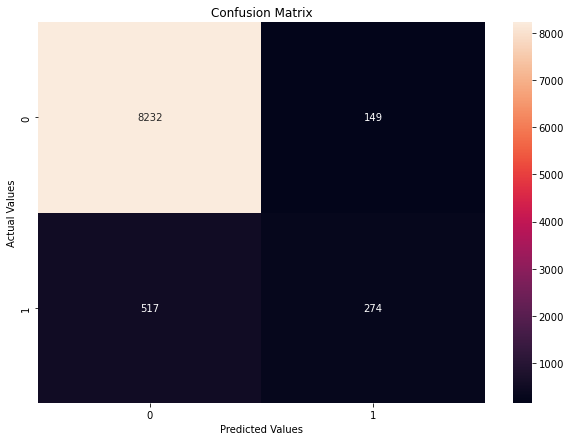

In [39]:
showConfusionMatrix(cm_gb_cm)

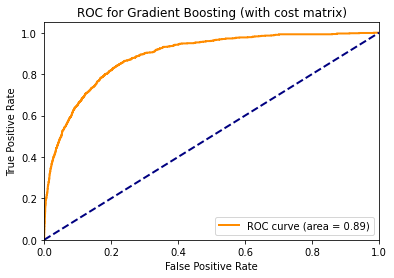

In [40]:
auc_gb_cm = roc_auc_score(y_val, gb_cm.predict_proba(X_val)[:, 1])
plotROC(y_val, gb_cm.predict_proba(X_val)[:, 1], auc_gb_cm, "Gradient Boosting (with cost matrix)")

## XGBoost

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)
xgb_pred = [round(value) for value in bst.predict(dtest)]
cm_xgb = confusion_matrix(y_test, xgb_pred)
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, tpr_xgb, tnr_xgb = getMetrics(cm_xgb)

ModuleNotFoundError: No module named 'xgboost'

## 4. Equal Calibration

In [ ]:
def demographic_parity(x, sensitive_feature: str, y_true, y_pred):
    # compute metrics by group ethnnicity
    mf = MetricFrame(metrics={'selection rate' : selection_rate}, 
                    y_true=y_true, 
                    y_pred=y_pred, 
                    sensitive_features=x[sensitive_feature])
    # print results
    display(mf.by_group)
    print("Overall SR: %.2f" % mf.overall[0])

    # summarize demographic parity as the max difference between groups
    print("demographic parity diff: %.2f" % mf.difference(method='between_groups')[0])

    # summarize demographic parity using the metric (this gives the exact same result as mf.difference())
    dpd = demographic_parity_difference(y_true=y_true, 
                                        y_pred=y_pred, 
                                        sensitive_features=x[sensitive_feature], 
                                        method='between_groups') # summarize as the max difference between any of the groups
    print("demographic parity diff: %.2f" % dpd)

In [56]:
def conf_intervals(x, sensitive_feature: str, y_true, y_pred):
    # compute metrics by group
    mf = MetricFrame(metrics={'selection rate' : selection_rate}, 
                    y_true=y_true, 
                    y_pred=y_pred, 
                    sensitive_features=x[sensitive_feature],
                    n_boot=100,
                    ci_quantiles=[0.025, 0.975], # for a 95% CI, we need the 0.025 and 0.975 quantiles
                    random_state=42)

    # display quantiles
    errors = pd.concat(mf.by_group_ci, keys=mf.ci_quantiles, axis=1)
    display(errors)

    # plot errorbars
    # matplotlib requires errorbars to be supplied as the size of the errorbar
    errors['size min'] = mf.by_group - errors.loc[:,0.025]
    errors['size max'] = errors.loc[:,0.975] - mf.by_group
    mf.by_group.plot(kind='bar', yerr=[errors['size min'], errors['size max']])
    plt.title("COMPAS selection rates (95% CI)")
    plt.show()

    # print confidence interval of maximum demographic parity difference
    dpd = mf.difference()
    dpd_ci = mf.difference_ci()
    print("demographic parity diff: %.2f (95 CI [%.2f, %.2f])" % (dpd.iloc[0], dpd_ci[0].iloc[0], dpd_ci[1].iloc[0]))

In [50]:

ethnicity_sensitive_feature = X_val.copy()
#reverse one hot encoding for the following ethnicities
# ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,ethnicity_nan
# if value is 1 then write down the string of that column.
# Reverse one-hot encoding into a single column 'Ethnicity'
ethnicities = ethnicity_sensitive_feature[['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian',
                  'ethnicity_Hispanic', 'ethnicity_Native American', 'ethnicity_Other/Unknown', 'ethnicity_nan']].idxmax(axis=1)

# Replace 'ethnicity_' prefix and drop 'ethnicity_' from the column names
ethnicities = ethnicities.str.replace('ethnicity_', '')

ethnicity_sensitive_feature['Ethnicity'] = ethnicities

# Drop the original one-hot encoded columns
ethnicity_sensitive_feature.drop(columns=['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian',
                 'ethnicity_Hispanic', 'ethnicity_Native American', 'ethnicity_Other/Unknown', 'ethnicity_nan'], inplace=True)


,death rate
Ethnicity,
African American,0.245685
Asian,0.312500
Caucasian,0.263053
Hispanic,0.263305
Native American,0.186667
Other/Unknown,0.246606
nan,0.163399


/tmp/ipykernel_395193/3202964294.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Overall SR: %.2f" % mf.overall[0])
/tmp/ipykernel_395193/3202964294.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("demographic parity diff: %.2f" % mf.difference(method='between_groups')[0])


Overall SR: 0.26
demographic parity diff: 0.15
demographic parity diff: 0.15


,0.025,0.975
,selection rate,selection rate
Ethnicity,,
African American,0.216885,0.267965
Asian,0.227448,0.418849
Caucasian,0.255670,0.274247
Hispanic,0.228653,0.306099
Native American,0.107177,0.295791
Other/Unknown,0.207916,0.284099
nan,0.116434,0.246430


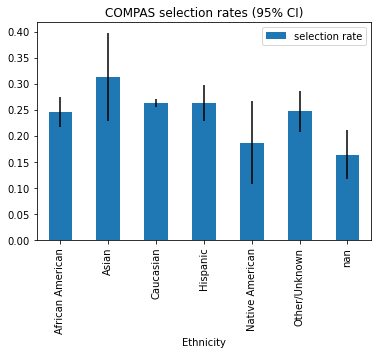

demographic parity diff: 0.15 (95 CI [0.09, 0.28])


In [57]:
demographic_parity(ethnicity_sensitive_feature, 'Ethnicity',y_val, lr_pred)
conf_intervals(ethnicity_sensitive_feature,'Ethnicity', y_val, lr_pred)

# Equal calibration

In [58]:
from sklearn.metrics import precision_score

def negative_predictive_value_score(y_true, y_pred, **kwargs):
    """
    NPV is not in scikit-learn, but is the same as PPV but with 0 and 1 swapped. 
    """
    return precision_score(y_true, y_pred, pos_label=0, **kwargs)

def compute(x, sensitive_feature: str, y_true, y_pred):
    mf = MetricFrame(metrics = 
                    {'positive predictive value' : precision_score,
                    'negative predictive value' : negative_predictive_value_score}, 
                    y_true=y_true, 
                    y_pred=y_pred, 
                    sensitive_features=x[sensitive_feature])
    display(mf.by_group)

    # summarize differences
    for i in mf.difference('between_groups').items():
        print("%s diff: %.2f" % i)

    # we can also define a custom fairness metric for npv (giving the same results as mf.differnece())
    npv_score_diff = make_derived_metric(metric=negative_predictive_value_score, transform='difference')
    npvd = npv_score_diff(y_true, 
                        y_pred, 
                        sensitive_features=x[sensitive_feature], 
                        method='between_groups')
    print("npv diff: %.2f" % npvd)

In [59]:
compute(ethnicity_sensitive_feature, 'Ethnicity',y_val, lr_pred)

,positive predictive value,negative predictive value
Ethnicity,,
African American,0.285124,0.985195
Asian,0.257143,0.987013
Caucasian,0.248112,0.973238
Hispanic,0.308511,0.939163
Native American,0.428571,0.950820
Other/Unknown,0.275229,0.972973
nan,0.240000,0.976562


positive predictive value diff: 0.19
negative predictive value diff: 0.05
npv diff: 0.05


In [125]:
from sklearn.calibration import calibration_curve
from numpy import ndarray

def show_calibration_curve(df, sensitive_feature: str, y_true: np.ndarray, y_pred: np.ndarray, feature_types):
    # make y_true and y_pred to be either [0,1]
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)

    x = df.copy()
    x['hospital_death'] = y_true
    x['hospital_death_predicted'] = y_pred

    plt.figure(figsize=(10, 10))

    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    for race in feature_types:
        subset = x[x[sensitive_feature]==race]
        fraction_of_positives, mean_predicted_value = calibration_curve(subset['hospital_death'],
                                                                        subset['hospital_death_predicted'], n_bins=10)
        plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=race)

    plt.xlabel("Mean predicted probability")
    plt.ylabel("Fraction of positives")
    plt.title("Calibration Curve")
    plt.legend(loc="best")
    plt.show() 

ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

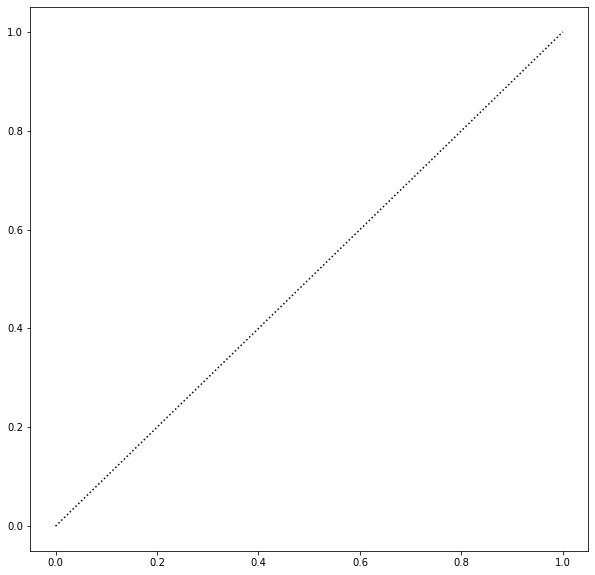

In [126]:
show_calibration_curve(ethnicity_sensitive_feature, 'Ethnicity', y_val, lr_pred, ['ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian','ethnicity_Hispanic', 'ethnicity_Native American', 'ethnicity_Other/Unknown', 'ethnicity_nan'])

In [117]:
gender_sensitive_feature = X_val.copy()

genders = gender_sensitive_feature[['gender_F','gender_M','gender_nan']].idxmax(axis=1)

# Replace 'ethnicity_' prefix and drop 'ethnicity_' from the column names
genders = genders.str.replace('gender_', '')

gender_sensitive_feature['Gender'] = genders

,death rate
Gender,
F,0.259501
M,0.257943
nan,0.400000


/tmp/ipykernel_395193/3202964294.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Overall SR: %.2f" % mf.overall[0])
/tmp/ipykernel_395193/3202964294.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("demographic parity diff: %.2f" % mf.difference(method='between_groups')[0])


Overall SR: 0.26
demographic parity diff: 0.14
demographic parity diff: 0.14


,0.025,0.975
,selection rate,selection rate
Gender,,
F,0.247562,0.271296
M,0.245333,0.271017
nan,0.000000,1.000000


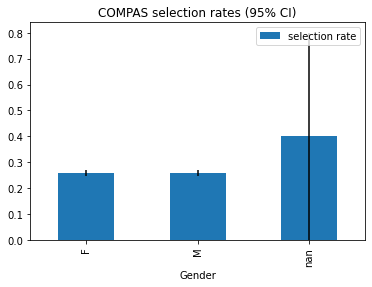

demographic parity diff: 0.14 (95 CI [0.01, 0.74])


In [118]:
demographic_parity(gender_sensitive_feature, 'Gender',y_val, lr_pred)
conf_intervals(gender_sensitive_feature,'Gender', y_val, lr_pred)

In [119]:
compute(gender_sensitive_feature, 'Gender',y_val, lr_pred)

,positive predictive value,negative predictive value
Gender,,
F,0.263060,0.975809
M,0.250962,0.971100
nan,0.500000,1.000000


positive predictive value diff: 0.25
negative predictive value diff: 0.03
npv diff: 0.03


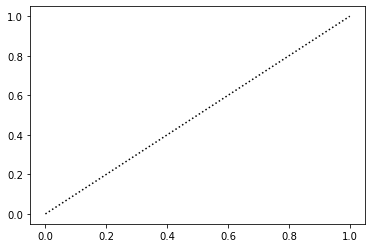

In [122]:
show_calibration_curve(gender_sensitive_feature, 'Gender',y_val, lr_pred, ['gender_F','gender_M','gender_nan'])